<a href="https://colab.research.google.com/github/Sam-East/GoogleCoLab/blob/master/ML_AZ_02__2_2_(Multiple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectures 2.2 ~ Folder 05 ~ Multiple Linear Regression:

**Data Pre-Processing Section:**

In [0]:
#IMPORTING THE LIBRARIES
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#IMPORTING THE DATA SET
#Data file From GitHub
url = 'https://raw.githubusercontent.com/Sam-East/DataFiles/master/50_Startups.csv' #Done
dataset=pd.read_csv(url)

#print(dataset, " \n \n")

'''
#Data file from computer upload
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
'''

X = dataset.iloc[:,:-1].values #(independent values)
Y = dataset.iloc[:,4].values #(dependent values)
#print(X, " \n \n")
#print(Y, " \n \n")


#Encoding Categorical Data with LabelEncoder and OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelEncoder_X = LabelEncoder()
#1st Column of Categorical Data of the DataSet X
X[:,3] = labelEncoder_X.fit_transform(X[:,3]) #Encoding of data onto Numbers


oneHotEncoder = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories = 'auto'),[3])],remainder='passthrough') #Encoding Dummy Variable
X = oneHotEncoder.fit_transform(X)

#SPLITTING THE DATA SET 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


#FEATURE SCALING
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#When we fit_transform the X_train the same fitting happens on the test but we need to apply transformation to it sepratly
#X_train = sc_X.fit_transform(X_train)
#X_test =  sc_X.transform(X_test) 


**Multiple Linear Regression**

**y = b0 + (b1*x1)+(b2*x2)+......+(bn*xn)**

- **x1,x2....,xn** are the independent variable.

- **y** is the dependent variable.

- **b0** is a constant, where line touches the y-axis.

- **b1,b2,.....,bn** are coefficients of the slops of lines.  


**Fitting the Multiple Linear Regression**

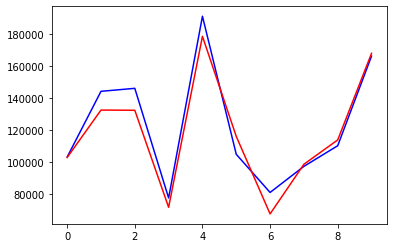

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,Y_train)

#Values for predicting (Testing values)
y_predict = regressor.predict(X_test)

plt.plot(Y_test,color = 'blue')
plt.plot(y_predict,color = 'red')
#plt.show()

#print(Y_test, " \n \n")
#print (y_predict)

**Backwards Elimination :** It involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit.

**Prepration for Backwards Elimination :** If we see in our equation for multiple linear regression all coefficients {b1 to bn} have a corresponding independent variable {x1 to xn} which is not the case for b0. So, to resolve this we will add a **x0 = 1**.

**Note :** We do the above change by adding a column of 1's to our dataset. This is only needed for our **statsmodels** library. Other libraries like **LinearRegression** take care of this on their own.

**So our equation will become from y = b0 + (b1*x1)+(b2*x2)+......+(bn*xn)**


**to y = (b0*x0) + (b1*x1)+(b2*x2)+......+(bn*xn) where x0 =1.**


x1,x2....,xn are the independent variable.

y is the dependent variable.

b0 is a constant, where line touches the y-axis.

b1,b2,.....,bn are coefficients of the slops of lines.


In [0]:
#Applying The Backwards Eimination

import statsmodels.api as sm #To calculate p-values and check stastical significances of variables for elimination

#Step 1: Preparing dataset by adding 1's column
X = X[:,1:] #Taking care of Dummy Variable trap
X = np.append(arr=np.ones((50,1)).astype(int), values=X, axis=1)

#Step 2: Setting optimal dataset as X at begining on which backwards elimination will be done 
X_opt = np.array(X[:, [0,1,2,3,4,5]], dtype=float) #Our optimal set of features
#Step 3: Fitting the model with all possiable predictors
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
#Step 4: Check for value with p value above our decided 0.5% and remove them
#regressor_OLS.summary()

#NOW WE REPEAT THE ALGORITHM UNTILL ALL THE STASTICALLY SIGNFICANT VARIABLES ARE LEFT 
#WE CHECK TO SEE THE P-VALUES THAT ARE ABOVE 0.5% AND THE REMOVE THEM

#This time we removed 2
X_opt = np.array(X[:, [0,1,3,4,5]], dtype=float)
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
#regressor_OLS.summary()

#This time we removed 1
X_opt = np.array(X[:, [0,3,4,5]], dtype=float) 
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
#regressor_OLS.summary()

#This time we removed 4
X_opt = np.array(X[:, [0,3,5]], dtype=float) 
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
#regressor_OLS.summary()

#This time we removed 5
X_opt = np.array(X[:, [0,3]], dtype=float) 
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
regressor_OLS.summary()

#Now we have compleated the process of backwards elimination
